In [1]:
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from timeit import default_timer as timer
import cv2
import seaborn as sns

import helperfunction as hf

## ACCESS IMAGES IN THE DIRECTORY

In [2]:
# Define the directory for images
# Rice Bran
partial_dir_rb = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Rice Bran\\Raw\\Set 2'
#partial_dir_rb = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Raw/Set 2'

# Define the subdirectories for each fabric type
pure_dir_rb = os.path.join(partial_dir_rb, 'Pure')
adulterated_dir_rb = os.path.join(partial_dir_rb, 'Adulterated')

# Soybean Meal
partial_dir_sbm = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Soybean Meal\\Raw\\Set 1'
#partial_dir_sbm = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Raw/Set 1'

# Define the subdirectories for each fabric type
pure_dir_sbm = os.path.join(partial_dir_sbm, 'Pure')
adulterated_dir_sbm = os.path.join(partial_dir_sbm, 'Adulterated')

# Ground Corn
partial_dir_corn = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Corn\\Raw\\Set 2'
#partial_dir_corn = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Raw/Set 2'

# Define the subdirectories for each fabric type
pure_dir_corn = os.path.join(partial_dir_corn, 'Pure')
adulterated_dir_corn = os.path.join(partial_dir_corn, 'Adulterated')

# display sample image
#image_path = os.path.join(adulterated_dir, 'adulterated_rb (500).jpg')
#image_path = os.path.join(pure_dir, 'pure_rb (500).jpg')

#image_path = os.path.join(adulterated_dir, 'adulterated_sbm (5).jpg')
#image_path = os.path.join(pure_dir, 'pure_sbm (5).jpg')

#image_path = os.path.join(adulterated_dir, 'adulterated_corn (5).jpg')
#image_path = os.path.join(pure_dir, 'pure_corn (5).jpg')


# img = mpimg.imread(image_path)
# print(img.shape)
# plt.imshow(img)
# plt.show()

# PRE-PROCESS IMAGES

In [8]:
# get images in each directory
def process_one_image(directory, output_path, img_index, class_name, kernel_num, limit_num):
    # Get a list of files in the directory, sorted by filename
    files = sorted(os.listdir(directory), key=lambda x: int(x.split('(')[1].split(')')[0]))

    for filename in files:
        if f'{class_name} ({img_index}).jpg' in filename and img_index <= limit_num:
            filepath = os.path.join(directory, filename)
            # print(filepath)
            # print(type(filepath))
            # print(type(filepath))
            
            if os.path.isfile(filepath):
                # Load the image
                img_samp = cv2.imread(filepath)

                if img_samp is not None:
                    # Extract RGB channels
                    r_channel = img_samp[:, :, 2]
                    g_channel = img_samp[:, :, 1]
                    b_channel = img_samp[:, :, 0]

                    # convert to gray image
                    gray_img = np.uint8((0.299 * r_channel)) + np.uint8((0.587 * g_channel)) + np.uint8((0.114 * b_channel))

                    # threshold image
                    thres_img = hf.segment_img(gray_img)

                    # Define a rectangular structuring element (kernel)
                    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_num, kernel_num))
                    
                    # Clean thresholded image
                    opened_img = cv2.morphologyEx(thres_img, cv2.MORPH_OPEN, kernel)

                    # Make the thresholded image into a 500 x 500 resolution
                    final_img = hf.extract_and_resize_foreground(img_samp, opened_img)

                    # Create the output folder if it doesn't exist
                    os.makedirs(output_path, exist_ok=True)

                    image_name = f'image ({img_index}).jpg'
                    img_index += 1
                    path = os.path.join(output_path, image_name)
                    cv2.imwrite(path, final_img)
                else:
                    print(f"Error: Unable to load {filename}")

# get images in each directory
def process_two_image(directory, output_path, img_index, class_name, limit_num, target_size):
    # Get a list of files in the directory, sorted by filename
    files = sorted(os.listdir(directory), key=lambda x: int(x.split('(')[1].split(')')[0]))

    for filename in files:
        if f'{class_name} ({img_index}).jpg' in filename and img_index <= limit_num:
            filepath = os.path.join(directory, filename)
            # print(filepath)
            # print(type(filepath))
            # print(type(filepath))
            
            if os.path.isfile(filepath):
                # Load the image
                img_samp = cv2.imread(filepath)

                if img_samp is not None:
                    
                    final_img = hf.resize_img(img_samp, target_size)

                    # Create the output folder if it doesn't exist
                    os.makedirs(output_path, exist_ok=True)

                    image_name = f'image ({img_index}).jpg'
                    img_index += 1
                    path = os.path.join(output_path, image_name)
                    cv2.imwrite(path, cv2.cvtColor(final_img, cv2.COLOR_RGB2BGR))
                    
                else:
                    print(f"Error: Unable to load {filename}")

### Rice Bran Pre-processing

In [9]:
# initialize kernel
default_kernel = 5

# Rice Bran Paths
adulterated_output_folder_path = rf'C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Processed\Set 3\Adulterated'
pure_output_folder_path = rf'C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Processed\Set 3\Pure'

# adulterated_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Processed/Set 2/Adulterated'
# pure_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Processed/Set 2/Pure'

# process_one_image(adulterated_dir, adulterated_output_folder_path, 1, 'adulterated_rb', default_kernel, 500)
# process_one_image(pure_dir, pure_output_folder_path, 1, 'pure_rb', default_kernel, 500)

# adulterated_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Processed/Set 3/Adulterated'
# pure_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Processed/Set 3/Pure'

process_two_image(adulterated_dir_rb, adulterated_output_folder_path, 1, 'adulterated_rb', 500, 2800)
process_two_image(pure_dir_rb, pure_output_folder_path, 1, 'pure_rb', 500, 2800)

### Soybean Meal Pre-processing

In [13]:
# initialize kernel
default_kernel = 5

# Soybean Meal Paths
adulterated_output_folder_path = rf'C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Soybean Meal\Processed\Set 1\Adulterated'
pure_output_folder_path = rf'C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Soybean Meal\Processed\Set 1\Pure'

# adulterated_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Processed/Set 1/Adulterated'
# pure_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Processed/Set 1/Pure'

# process_one_image(adulterated_dir, adulterated_output_folder_path, 1, 'adulterated_sbm', default_kernel, 500)
# process_one_image(pure_dir, pure_output_folder_path, 1, 'pure_sbm', default_kernel, 500)

# adulterated_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Processed/Set 2/Adulterated'
# pure_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Processed/Set 2/Pure'

process_two_image(adulterated_dir_sbm, adulterated_output_folder_path, 1, 'adulterated_sbm', 500, 2800)
process_two_image(pure_dir_sbm, pure_output_folder_path, 1, 'pure_sbm', 500, 2800)

### Corn Pre-processing

In [16]:
# initialize kernel
default_kernel = 5

# Corn Paths
adulterated_output_folder_path = rf'C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Corn\Processed\Set 2\Adulterated'
pure_output_folder_path = rf'C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Corn\Processed\Set 2\Pure'

# adulterated_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Processed/Set 1/Adulterated'
# pure_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Processed/Set 1/Pure'

# process_one_image(adulterated_dir, adulterated_output_folder_path, 1, 'adulterated_corn', default_kernel, 500)
# process_one_image(pure_dir, pure_output_folder_path, 1, 'pure_corn', default_kernel, 500)

# adulterated_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Processed/Set 2/Adulterated'
# pure_output_folder_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Processed/Set 2/Pure'

process_two_image(adulterated_dir_corn, adulterated_output_folder_path, 1, 'adulterated_corn', 500, 2800)
process_two_image(pure_dir_corn, pure_output_folder_path, 1, 'pure_corn', 500, 2800)

### For depicted image

In [ ]:
# Saving image that don't need high kernel
# Adulterated
changed_kernel_1 = 3
#process_one_image(adulterated_dir, adulterated_output_folder_path, 241, 'adulterated_rb', changed_kernel_1, 260)


# Pure
# changed_kernel_2 = 5
# process_image(pure_dir, pure_output_folder_path, 301, 'pure_rb', changed_kernel_2, 420)

### Transfer Images for Training and Testing

In [18]:
# Rice Bran

aduterated_sourcepath_1 = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Rice Bran\\Processed\\Set 3\\Adulterated'
pure_sourcepath_1 = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Rice Bran\\Processed\\Set 3\\Pure'

# aduterated_sourcepath_2 = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Processed/Set 3/Adulterated'
# pure_sourcepath_2 = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Processed/Set 3/Pure'

# hf.transfer_image_train_and_test(aduterated_sourcepath_1, '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Testing/Set 2/Adulterated', '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Training and Validation/Set 2/Adulterated')

# hf.transfer_image_train_and_test(pure_sourcepath_1, '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Testing/Set 2/Pure', '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Training and Validation/Set 2/Pure')

hf.transfer_image_train_and_test(aduterated_sourcepath_1, 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Rice Bran\\Testing\\Set 1\\Adulterated', 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Rice Bran\\Training and Validation\\Set 1\\Adulterated')

hf.transfer_image_train_and_test(pure_sourcepath_1, 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Rice Bran\\Testing\\Set 1\\Pure', 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Rice Bran\\Training and Validation\\Set 1\\Pure')

Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Processed\Set 3\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Testing\Set 1\Adulterated\image (1).jpg
Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Processed\Set 3\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Testing\Set 1\Adulterated\image (2).jpg
Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Processed\Set 3\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Testing\Set 1\Adulterated\image (3).jpg
Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Processed\Set 3\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thes

In [19]:
# Soybean Meal
adulterated_sourcepath_1 = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Soybean Meal\\Processed\\Set 1\\Adulterated'
pure_sourcepath_1 = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Soybean Meal\\Processed\\Set 1\\Pure'

# adulterated_sourcepath_2 = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Processed/Set 2/Adulterated'
# pure_sourcepath_2 = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Processed/Set 2/Pure'

hf.transfer_image_train_and_test(adulterated_sourcepath_1, 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Soybean Meal\\Testing\\Set 1\\Adulterated', 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Soybean Meal\\Training and Validation\\Set 1\\Adulterated')

hf.transfer_image_train_and_test(pure_sourcepath_1, 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Soybean Meal\\Testing\\Set 1\\Pure', 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Soybean Meal\\Training and Validation\\Set 1\\Pure')

# hf.transfer_image_train_and_test(adulterated_sourcepath_2, '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Testing/Set 2/Adulterated', '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Training and Validation/Set 2/Adulterated')

# hf.transfer_image_train_and_test(pure_sourcepath_2, '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Testing/Set 2/Pure', '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Training and Validation/Set 2/Pure')

Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Soybean Meal\Processed\Set 1\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Soybean Meal\Testing\Set 1\Adulterated\image (1).jpg
Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Soybean Meal\Processed\Set 1\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Soybean Meal\Testing\Set 1\Adulterated\image (2).jpg
Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Soybean Meal\Processed\Set 1\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Soybean Meal\Testing\Set 1\Adulterated\image (3).jpg
Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Soybean Meal\Processed\Set 1\Adulterated to C:\Users\hp\Documents\VSU F

In [21]:
# Corn
adulterated_sourcepath_1 = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Corn\\Processed\\Set 2\\Adulterated'
pure_sourcepath_1 = 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Corn\\Processed\\Set 2\\Pure'

# adulterated_sourcepath_2 = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Processed/Set 2/Adulterated'
# pure_sourcepath_2 = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Processed/Set 2/Pure'

hf.transfer_image_train_and_test(adulterated_sourcepath_1, 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Corn\\Testing\\Set 1\\Adulterated', 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Corn\\Training and Validation\\Set 1\\Adulterated')

hf.transfer_image_train_and_test(pure_sourcepath_1, 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Corn\\Testing\\Set 1\\Pure', 'C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Corn\\Training and Validation\\Set 1\\Pure')

# hf.transfer_image_train_and_test(adulterated_sourcepath_2, '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Testing/Set 2/Adulterated', '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Training and Validation/Set 2/Adulterated')

# hf.transfer_image_train_and_test(pure_sourcepath_2, '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Testing/Set 2/Pure', '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Training and Validation/Set 2/Pure')

Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Corn\Processed\Set 2\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Corn\Testing\Set 1\Adulterated\image (1).jpg
Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Corn\Processed\Set 2\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Corn\Testing\Set 1\Adulterated\image (2).jpg
Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Corn\Processed\Set 2\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Corn\Testing\Set 1\Adulterated\image (3).jpg
Image moved successfully from C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Corn\Processed\Set 2\Adulterated to C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Corn\Test

### Data Augmentation

In [10]:
# Rice Bran
#dir1 = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Training and Validation/Set 2'
dir_rb = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Training and Validation/Set 3'

# Define the subdirectories for each type
pure_dir_rb = os.path.join(dir_rb, 'Pure')
adulterated_dir_rb = os.path.join(dir_rb, 'Adulterated')

hf.img_augmentation(pure_dir_rb, 3000)
hf.img_augmentation(adulterated_dir_rb, 3000)

# Soybean Meal
dir_sbm = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Training and Validation/Set 2'

# Define the subdirectories for each type
pure_dir_sbm = os.path.join(dir_sbm, 'Pure')
adulterated_dir_sbm = os.path.join(dir_sbm, 'Adulterated')

hf.img_augmentation(pure_dir_sbm, 3000)
hf.img_augmentation(adulterated_dir_sbm, 3000)

# Corn
dir_corn = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Training and Validation/Set 2'

# Define the subdirectories for each type
pure_dir_corn = os.path.join(dir_corn, 'Pure')
adulterated_dir_corn = os.path.join(dir_corn, 'Adulterated')

hf.img_augmentation(pure_dir_corn, 3000)
hf.img_augmentation(adulterated_dir_corn, 3000)

Initialised with 200 image(s) found.
Output directory set to /mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Training and Validation/Set 3/Pure/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF59CEA39B0>: 100%|██████████| 3000/3000 [00:31<00:00, 93.86 Samples/s]                   


Initialised with 200 image(s) found.
Output directory set to /mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Training and Validation/Set 3/Adulterated/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF596AB7B90>: 100%|██████████| 3000/3000 [00:31<00:00, 94.20 Samples/s]                   


Initialised with 200 image(s) found.
Output directory set to /mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Training and Validation/Set 2/Pure/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF5EC1ED910>: 100%|██████████| 3000/3000 [00:31<00:00, 95.63 Samples/s]                   


Initialised with 200 image(s) found.
Output directory set to /mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Training and Validation/Set 2/Adulterated/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF596D5B830>: 100%|██████████| 3000/3000 [00:33<00:00, 89.06 Samples/s]                   


Initialised with 200 image(s) found.
Output directory set to /mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Training and Validation/Set 2/Pure/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF59CEFAA20>: 100%|██████████| 3000/3000 [00:28<00:00, 106.90 Samples/s]                  


Initialised with 200 image(s) found.
Output directory set to /mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Training and Validation/Set 2/Adulterated/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF59D0CB710>: 100%|██████████| 3000/3000 [00:29<00:00, 101.54 Samples/s]                  


## Experiment Part

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
#img_samp = cv2.imread(rf"C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Dataset Images\Rice Bran\Raw\Pure\pure_rb (21).jpg", cv2.COLOR_BGR2RGB)
#img_samp = cv2.imread(rf"C:\Users\hp\Documents\VSU Files\Fourth Year\Thesis\Program\Dataset Images\Rice Bran\Raw\Adulterated\adulterated_rb (125).jpg", cv2.COLOR_BGR2RGB)

#img_path = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Raw/Set 2/Adulterated/adulterated_rb (1)'
img_samp = cv2.imread(image_path)

thres_img = hf.segment_img(img_samp)

# img_rgb = cv2.cvtColor(thres_img, cv2.COLOR_BGR2RGB)

axes[0].imshow(thres_img)
axes[0].set_title("Image")
axes[0].axis('off')

#Extract RGB channels
r_channel = img_samp[:, :, 2]
g_channel = img_samp[:, :, 1]
b_channel = img_samp[:, :, 0]

gray_img = np.uint8((0.299 * r_channel)) + np.uint8((0.587 * g_channel)) + np.uint8((0.114 * b_channel))

# Display the image in the first subplot
axes[0].imshow(img_samp) 
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display the grayscale image in the second subplot (if needed)
axes[1].imshow(gray_img, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis('off')

# Display the thresholded image in the second subplot (if needed)
thres_img = hf.segment_img(gray_img)
axes[2].imshow(thres_img, cmap='gray')
axes[2].set_title("Thresholded Image")
axes[2].axis('off')


# Define a rectangular structuring element (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
opened_img = cv2.morphologyEx(thres_img, cv2.MORPH_OPEN, kernel)

final_img = hf.extract_and_resize_foreground(img_samp, opened_img)

axes[3].imshow(final_img)
axes[3].axis('off')
axes[3].set_title("Clean Image")

(4160, 3120, 3)


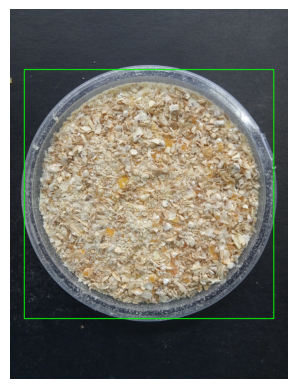

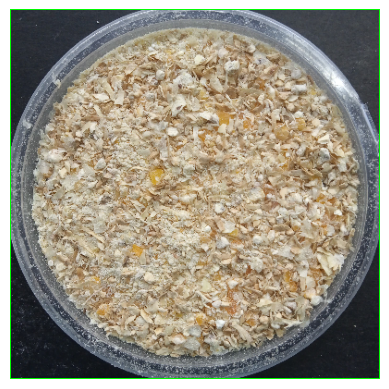

(400, 400, 3)


In [4]:
# Convert BGR to RGB for Matplotlib display
# img_rgb = cv2.cvtColor(img_samp, cv2.COLOR_BGR2RGB)

# print(img_rgb.shape)

# target_size = 2800
# pos = 2

# # Draw triangle in the image
# cv2.rectangle(img_rgb, ((img_rgb.shape[1] - target_size) // pos, (img_rgb.shape[0] - target_size) // pos), ((img_rgb.shape[1] + target_size) // pos, (img_rgb.shape[0] + target_size) // pos), (0, 255, 0), 3)

# # Display the image with aspect ratio preserved and no axes
# plt.imshow(img_rgb)
# plt.axis('off')
# plt.show()

image_path = os.path.join(adulterated_dir_corn, 'adulterated_corn (1).jpg')

img_samp = cv2.imread(image_path)
# Convert BGR to RGB for Matplotlib display
img_rgb = cv2.cvtColor(img_samp, cv2.COLOR_BGR2RGB)

print(img_rgb.shape)

target_size = 2800
pos = 2

# Define the rectangle coordinates
x1 = (img_rgb.shape[1] - target_size) // pos
y1 = (img_rgb.shape[0] - target_size) // pos
x2 = (img_rgb.shape[1] + target_size) // pos
y2 = (img_rgb.shape[0] + target_size) // pos

# Draw rectangle in the image
cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 10)

# Extract the region of interest (ROI) within the rectangle
roi = img_rgb[y1:y2, x1:x2]

# Resize the ROI to 400x400
resized_roi = cv2.resize(roi, (400, 400))

# Save the resized ROI
#cv2.imwrite('resized_roi2.jpg', cv2.cvtColor(resized_roi, cv2.COLOR_RGB2BGR))

# Display the original image with the rectangle
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Display the resized ROI
plt.imshow(resized_roi)
plt.axis('off')
plt.show()

print(resized_roi.shape)